In [71]:
import torch
import torch.nn.functional as F     # 激励函数都在这
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from torch.autograd import Variable

In [72]:
class Net(torch.nn.Module):  # 继承 torch 的 Module
    def __init__(self, n_feature, n_hidden, n_output):
        super(Net, self).__init__()     # 继承 __init__ 功能
        # 定义每层用什么样的形式
        self.hidden = torch.nn.Linear(n_feature, n_hidden)   # 隐藏层线性输出
        self.predict = torch.nn.Linear(n_hidden, n_output)   # 输出层线性输出

    def forward(self, x):   # 这同时也是 Module 中的 forward 功能
        # 正向传播输入值, 神经网络分析出输出值
        x = F.relu(self.hidden(x))      # 激励函数(隐藏层的线性值)
        x = self.predict(x)             # 输出值
        return x

# net = Net(n_feature=5, n_hidden=10, n_output=1)

# print(net)  # net 的结构

In [73]:
raw_data = pd.read_csv("data.csv", index_col = 0)
print(raw_data.head())

  family  father  mother  midparentHeight  children  childNum  gender  \
1    001    78.5    67.0            75.43         4         1    male   
2    001    78.5    67.0            75.43         4         2  female   
3    001    78.5    67.0            75.43         4         3  female   
4    001    78.5    67.0            75.43         4         4  female   
5    002    75.5    66.5            73.66         4         1    male   

   childHeight  
1         73.2  
2         69.2  
3         69.0  
4         69.0  
5         73.5  


In [74]:
processed_data = raw_data[["father","mother",  "midparentHeight",  "children", "gender", "childHeight"]]
processed_data["gender"] = [1 if i == "male" else 0 for i in processed_data["gender"]]
print(processed_data.head())

   father  mother  midparentHeight  children  gender  childHeight
1    78.5    67.0            75.43         4       1         73.2
2    78.5    67.0            75.43         4       0         69.2
3    78.5    67.0            75.43         4       0         69.0
4    78.5    67.0            75.43         4       0         69.0
5    75.5    66.5            73.66         4       1         73.5


C:\Users\tskc1\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [100]:
train_num = 600
train_x = np.array(processed_data.iloc[:train_num, :5])
train_y = np.array(processed_data.iloc[:train_num, 5:])
test_x = np.array(processed_data.iloc[train_num:, :5])
test_y = np.array(processed_data.iloc[train_num:, 5:])

train_x = Variable(torch.from_numpy(train_x)).float()
train_y= Variable(torch.from_numpy(train_y)).float()
print(train_x)
# print(train_y)

tensor([[78.5000, 67.0000, 75.4300,  4.0000,  1.0000],
        [78.5000, 67.0000, 75.4300,  4.0000,  0.0000],
        [78.5000, 67.0000, 75.4300,  4.0000,  0.0000],
        ...,
        [68.0000, 65.0000, 69.1000,  4.0000,  1.0000],
        [68.0000, 65.0000, 69.1000,  4.0000,  1.0000],
        [68.0000, 65.0000, 69.1000,  4.0000,  0.0000]])


In [101]:
net = Net(5, 6, 1) 
# print(net) # 打印输出net的结构 
  
# 定义优化器和损失函数 
optimizer = torch.optim.SGD(net.parameters(), lr=0.05) # 传入网络参数和学习率 
loss_function = torch.nn.MSELoss() # 最小均方误差 
  

  


tensor([[67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.

tensor([[67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.

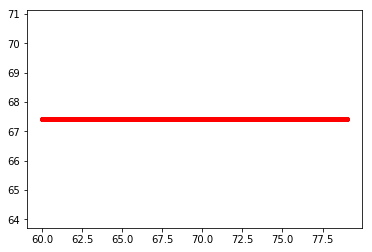

tensor([[67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.

        [67.4143]], grad_fn=<AddmmBackward>)
tensor([[67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
     

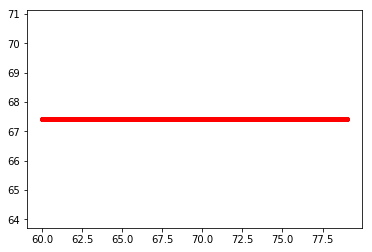

tensor([[67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.

        [67.4143]], grad_fn=<AddmmBackward>)
tensor([[67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
     

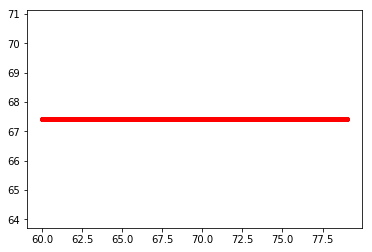

tensor([[67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.

        [67.4143]], grad_fn=<AddmmBackward>)
tensor([[67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
     

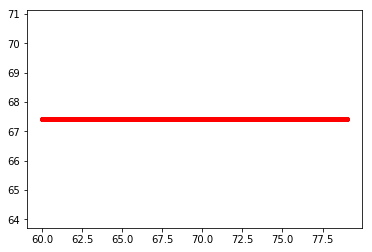

tensor([[67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.

        [67.4143]], grad_fn=<AddmmBackward>)
tensor([[67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
     

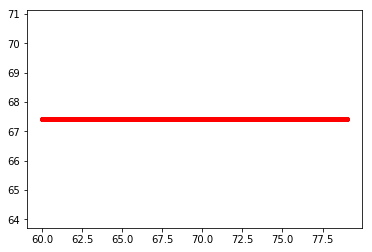

tensor([[67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.

        [67.4143]], grad_fn=<AddmmBackward>)
tensor([[67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
     

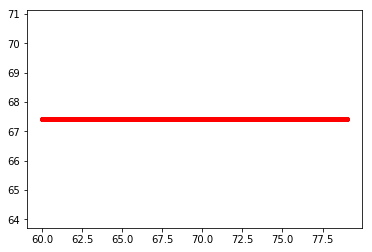

tensor([[67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.

tensor([[67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.

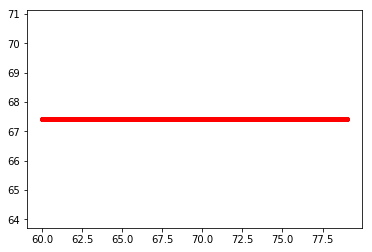

tensor([[67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.

tensor([[67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.

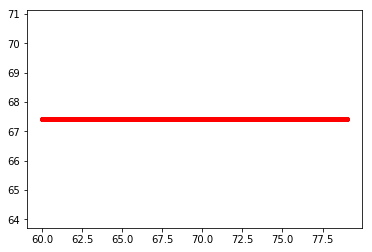

tensor([[67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.

        [67.4143]], grad_fn=<AddmmBackward>)
tensor([[67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
     

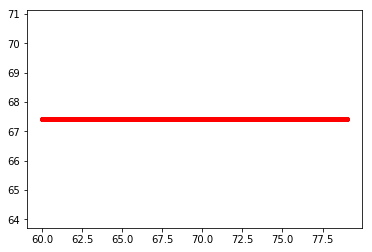

tensor([[67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.

tensor([[67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.

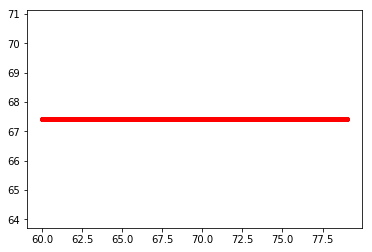

tensor([[67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.

        [67.4143]], grad_fn=<AddmmBackward>)
tensor([[67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
     

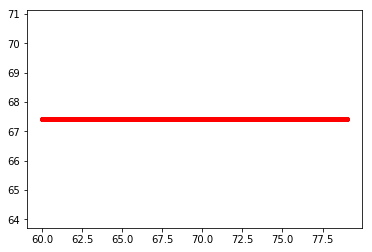

tensor([[67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.

        [67.4143]], grad_fn=<AddmmBackward>)
tensor([[67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
     

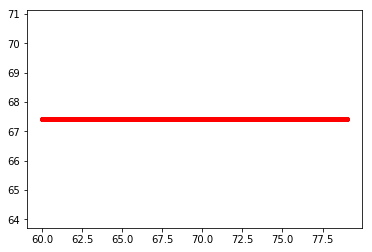

tensor([[67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.

tensor([[67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.

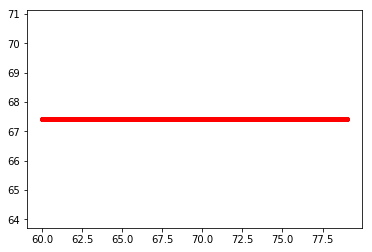

tensor([[67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.

tensor([[67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.

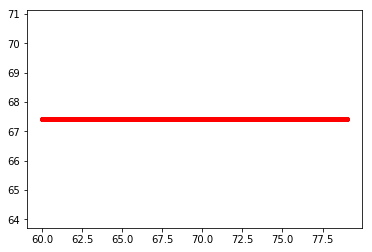

tensor([[67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.

tensor([[67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.

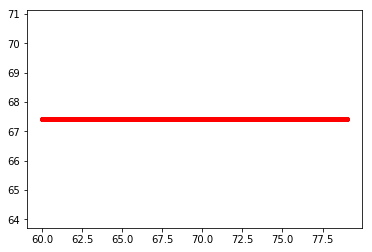

tensor([[67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.

tensor([[67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.

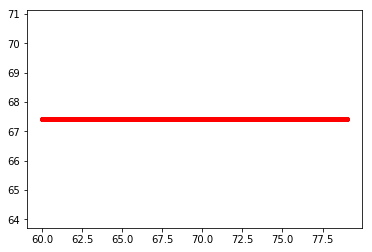

tensor([[67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.

        [67.4143]], grad_fn=<AddmmBackward>)
tensor([[67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
     

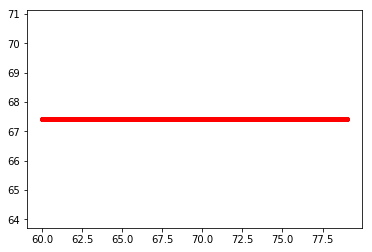

tensor([[67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.

tensor([[67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.

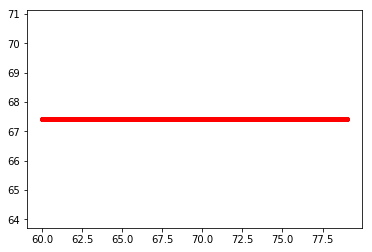

tensor([[67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.

tensor([[67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.

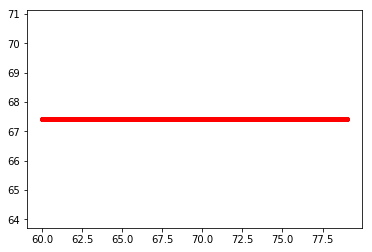

tensor([[67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.

tensor([[67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.

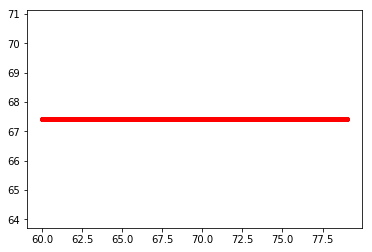

tensor([[67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.

        [67.4143]], grad_fn=<AddmmBackward>)
tensor([[67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
     

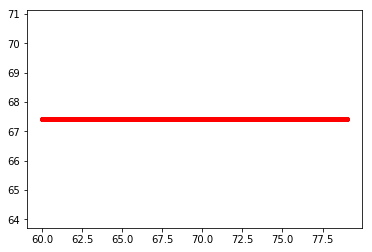

tensor([[67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.

tensor([[67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.

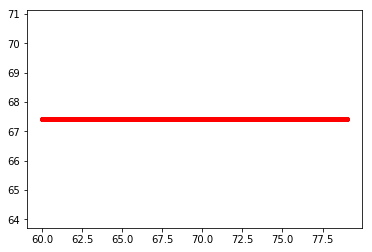

tensor([[67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.

tensor([[67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.

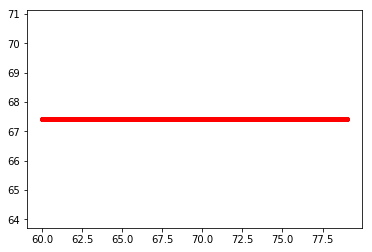

tensor([[67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.

tensor([[67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.

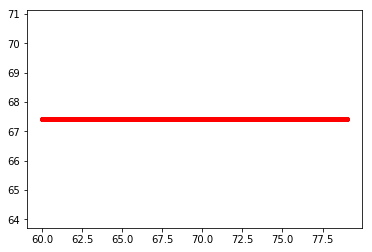

tensor([[67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.

tensor([[67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.

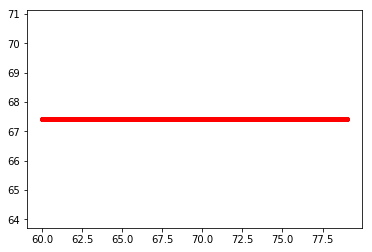

tensor([[67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.

        [67.4143]], grad_fn=<AddmmBackward>)
tensor([[67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
     

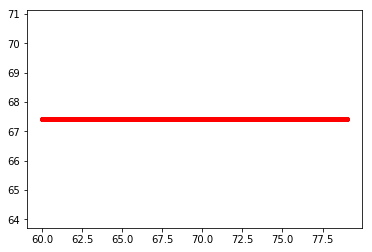

tensor([[67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.

tensor([[67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.

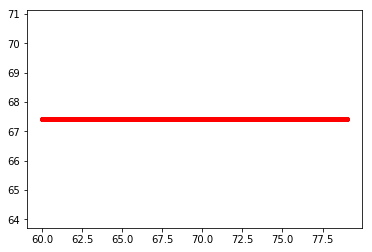

tensor([[67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.

tensor([[67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.

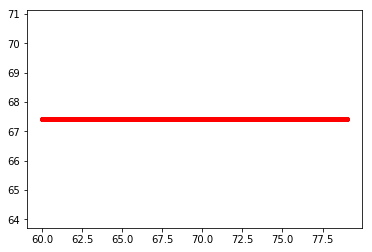

tensor([[67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.

tensor([[67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.

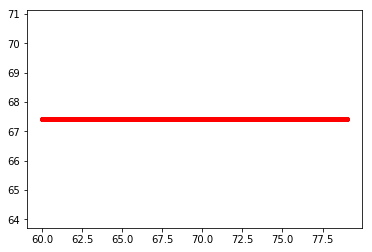

tensor([[67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.

        [67.4143]], grad_fn=<AddmmBackward>)
tensor([[67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
        [67.4143],
     

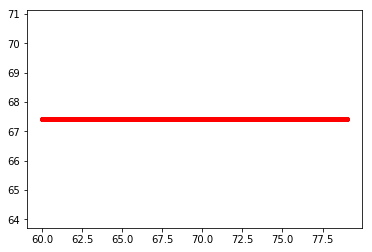

In [93]:
for t in range(300): 
  prediction = net(train_x) # 把数据x喂给net，输出预测值 
  loss = loss_function(prediction, train_y) # 计算两者的误差，要注意两个参数的顺序 
  optimizer.zero_grad() # 清空上一步的更新参数值 
  loss.backward() # 误差反相传播，计算新的更新参数值 
  optimizer.step() # 将计算得到的更新值赋给net.parameters() 
    
  print(prediction)
  if (t+1) % 10 == 0: 
        plt.cla() 
#         plt.scatter(train_x.data.numpy(), train_y.data.numpy()) 
        plt.plot(train_y.data.numpy().reshape(1,-1)[0], prediction.data.numpy().reshape(1,-1)[0], 'r-', lw=5) 
        plt.pause(0.1)


In [98]:
x = torch.unsqueeze(torch.linspace(-1, 1, 100), dim=1) # 将1维的数据转换为2维数据 
y = x.pow(2) + 0.2 * torch.rand(x.size())

x, y = Variable(x), Variable(y)
print(x,y)

net = Net(1, 6, 1) 
# print(net) # 打印输出net的结构 
  
# 定义优化器和损失函数 
optimizer = torch.optim.SGD(net.parameters(), lr=0.5) # 传入网络参数和学习率 
loss_function = torch.nn.MSELoss() # 最小均方误差 

tensor([[-1.0000],
        [-0.9798],
        [-0.9596],
        [-0.9394],
        [-0.9192],
        [-0.8990],
        [-0.8788],
        [-0.8586],
        [-0.8384],
        [-0.8182],
        [-0.7980],
        [-0.7778],
        [-0.7576],
        [-0.7374],
        [-0.7172],
        [-0.6970],
        [-0.6768],
        [-0.6566],
        [-0.6364],
        [-0.6162],
        [-0.5960],
        [-0.5758],
        [-0.5556],
        [-0.5354],
        [-0.5152],
        [-0.4949],
        [-0.4747],
        [-0.4545],
        [-0.4343],
        [-0.4141],
        [-0.3939],
        [-0.3737],
        [-0.3535],
        [-0.3333],
        [-0.3131],
        [-0.2929],
        [-0.2727],
        [-0.2525],
        [-0.2323],
        [-0.2121],
        [-0.1919],
        [-0.1717],
        [-0.1515],
        [-0.1313],
        [-0.1111],
        [-0.0909],
        [-0.0707],
        [-0.0505],
        [-0.0303],
        [-0.0101],
        [ 0.0101],
        [ 0.0303],
        [ 0.

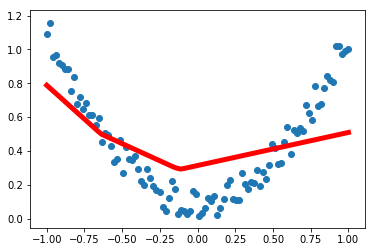

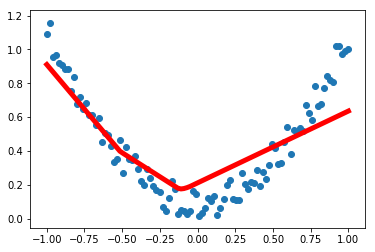

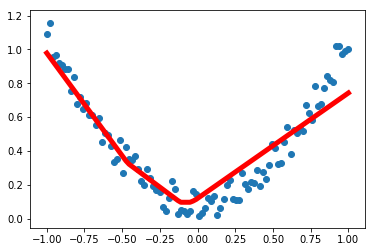

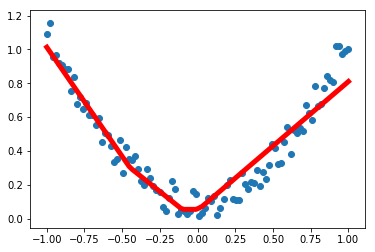

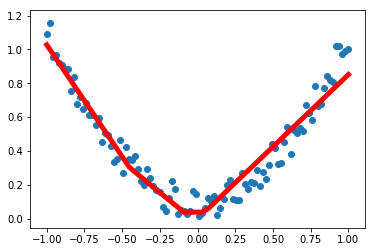

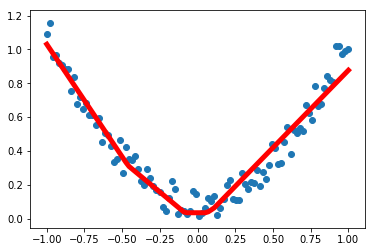

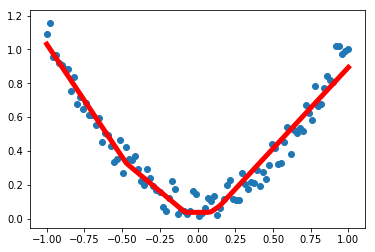

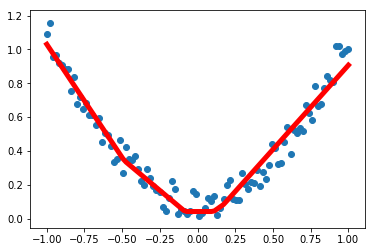

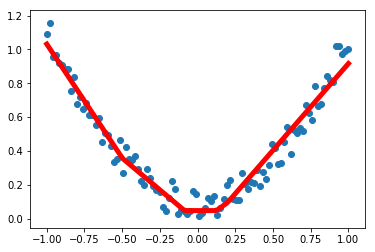

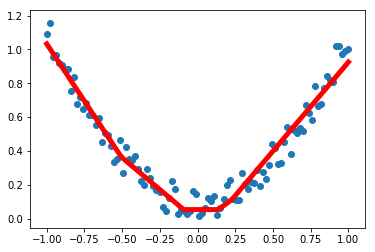

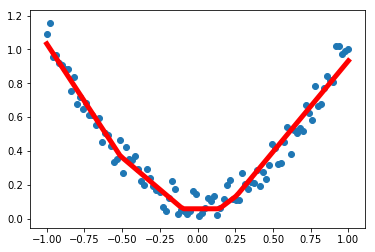

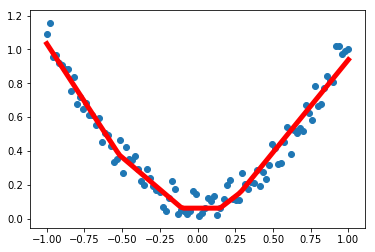

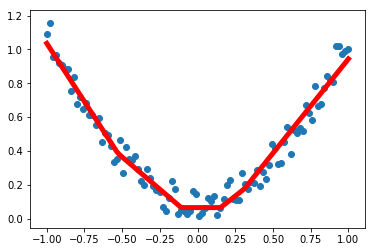

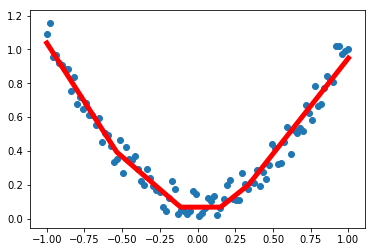

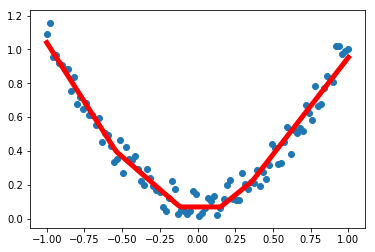

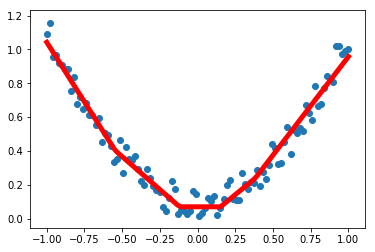

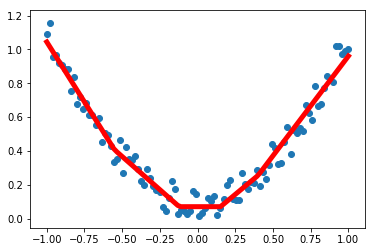

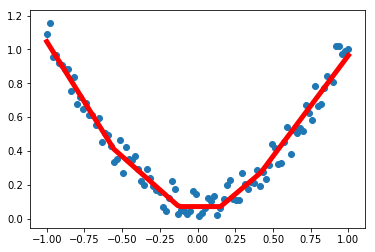

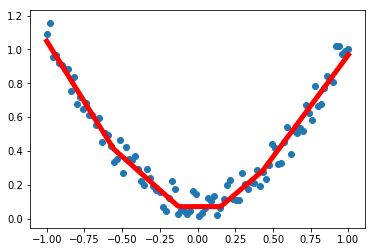

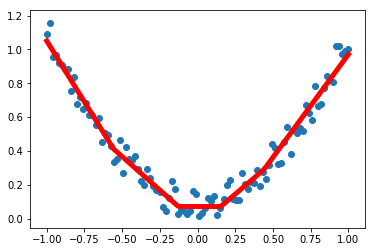

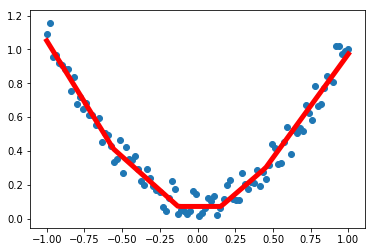

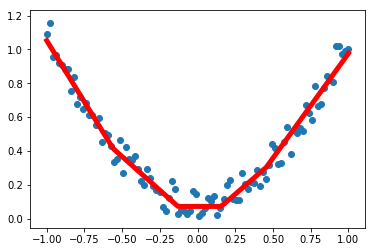

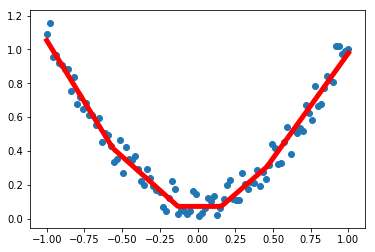

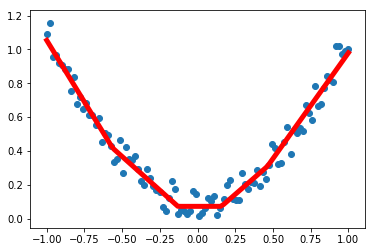

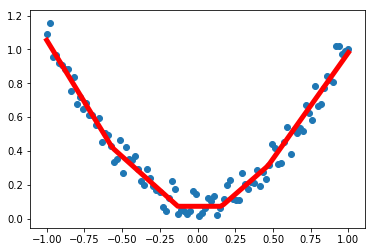

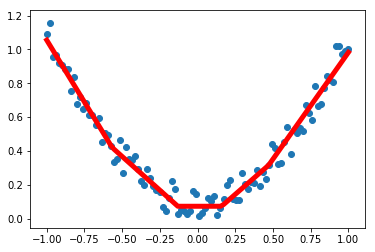

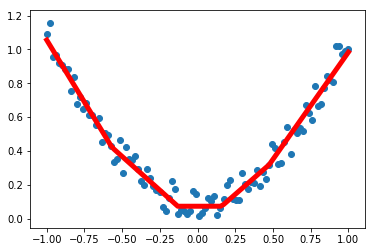

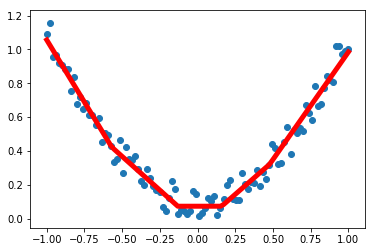

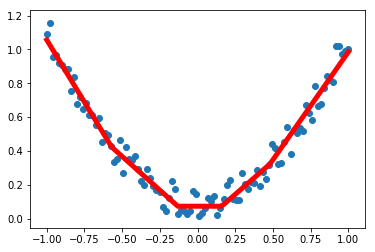

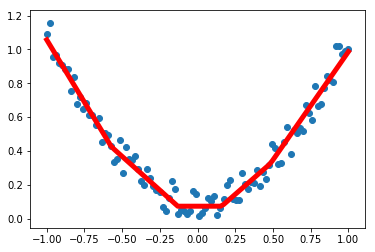

In [99]:
for t in range(300): 
  prediction = net(x) # 把数据x喂给net，输出预测值 
  loss = loss_function(prediction, y) # 计算两者的误差，要注意两个参数的顺序 
  optimizer.zero_grad() # 清空上一步的更新参数值 
  loss.backward() # 误差反相传播，计算新的更新参数值 
  optimizer.step() # 将计算得到的更新值赋给net.parameters() 
    
  if (t+1) % 10 == 0: 
        plt.cla() 
        plt.scatter(x.data.numpy(), y.data.numpy()) 
        plt.plot(x.data.numpy(), prediction.data.numpy(), 'r-', lw=5) 
        #     plt.text(0.5, 0, 'L=%.4f' % loss.data[0], fontdict={'size': 20, 'color': 'red'}) 
        plt.pause(0.1)
